In [2]:
pip install git+https://github.com/scls19fr/pandas-helper-calc

  Cloning https://github.com/scls19fr/pandas-helper-calc to /tmp/pip-req-build-iyvfm6b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-x2ai6_84/wheels/3a/61/04/aaba36681e1c440e45a195119a13b2d86645158ae5dd984c14
Successfully built pandas-helper-calc
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_helper_calc
import seaborn as sns
%matplotlib inline
font = {'size'   : 25}
mpl.rc('font', **font)

In [3]:
dfm = pd.read_csv("./bases/suicide/suicidioMasculinoGlobal.csv")
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculino.csv")

In [4]:
dfe = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [5]:
dff = pd.read_csv("./bases/suicide/suicidioFemininoGlobal.csv")
dffem = pd.read_csv("./bases/suicide/suicidiofeminino.csv")

In [6]:
df = pd.merge(dfm, dff, on='year', suffixes=['m','f'])

In [12]:
dfx = dfe[dfe.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
dfx = dfx[["CountryCode","Year","Value"]].reset_index(drop=True)
dfx.rename(columns={'CountryCode':'countrycode','Year':'year','Value':'value'},inplace=True)

In [13]:
dfmasc = dfmasc.join(dfx.set_index(['countrycode','year']), on=['countrycode','year'])
dfmasc.rename(columns={'value':'gdp'}, inplace=True)

In [ ]:
dff

In [ ]:
dfm

In [39]:
dff = dff.reset_index()
dfm = dfm.reset_index()

In [ ]:
cor = []

list(map(lambda x: dfm[x].corr(dff[x]), dff.columns))

#for col in dff.columns():
 #   corr.append(dfm[col].corr(dff[col]))

Text(0.5, 1.0, 'Variação diferencial da taxa de suicídio feminina por faixa etária por ano')

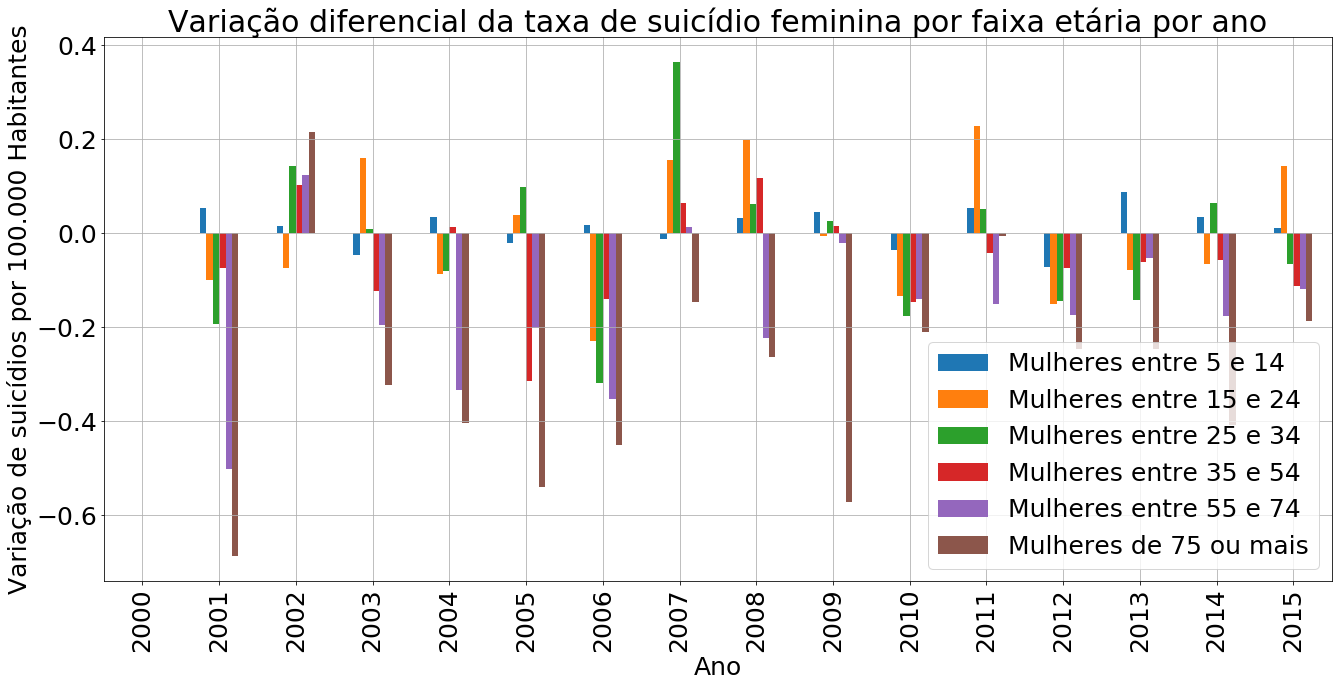

In [62]:
fig, ax = plt.subplots(figsize=(22, 10))
dffdiff = pd.DataFrame(columns=['une514','une1524', 'une2534', 'une3554','une5574','une75'])
dffdiff['une514'] = dff['suicidio514'].calc.derivative()
dffdiff['une1524'] = dff['suicidio1524'].calc.derivative()
dffdiff['une2534'] = dff['suicidio2534'].calc.derivative()
dffdiff['une3554'] = dff['suicidio3554'].calc.derivative()
dffdiff['une5574'] = dff['suicidio5574'].calc.derivative()
dffdiff['une75'] = dff['suicidio75'].calc.derivative()
dffdiff['year'] = dff['year']
dffdiff.plot(grid=True, kind='bar', ax=ax, x='year', y=['une514','une1524', 'une2534', 'une3554','une5574','une75'])
#dffdiff['une514'].plot.bar(grid=True, ax=ax, color='red',label="Mulheres entre 5 e 14")
#dffdiff['une1524'].plot.bar(grid=True, ax=ax, color='green', label="Mulheres entre 15 e 24")
#dffdiff['une2534'].plot.bar(grid=True, ax=ax, color='blue', label="Mulheres entre 25 e 34")
#dffdiff['une3554'].plot.bar(grid=True, ax=ax, color='orange', label="Mulheres entre 35 e 54")
#dffdiff['une5574'].plot.bar(grid=True, ax=ax, color='purple', label="Mulheres entre 55 e 74")
#dffdiff['une75'].plot.bar(grid=True, ax=ax, color='brown', label="Mulheres de 75 ou mais")
ax.legend(labels=["Mulheres entre 5 e 14","Mulheres entre 15 e 24","Mulheres entre 25 e 34","Mulheres entre 35 e 54","Mulheres entre 55 e 74","Mulheres de 75 ou mais"])
ax.set_xlabel("Ano")
ax.set_ylabel("Variação de suicídios por 100.000 Habitantes")
ax.set_title("Variação diferencial da taxa de suicídio feminina por faixa etária por ano")

In [ ]:
dffdiff

Text(0.5, 1.0, 'Variação diferencial da taxa de suicídio masculina por faixa etária por ano')

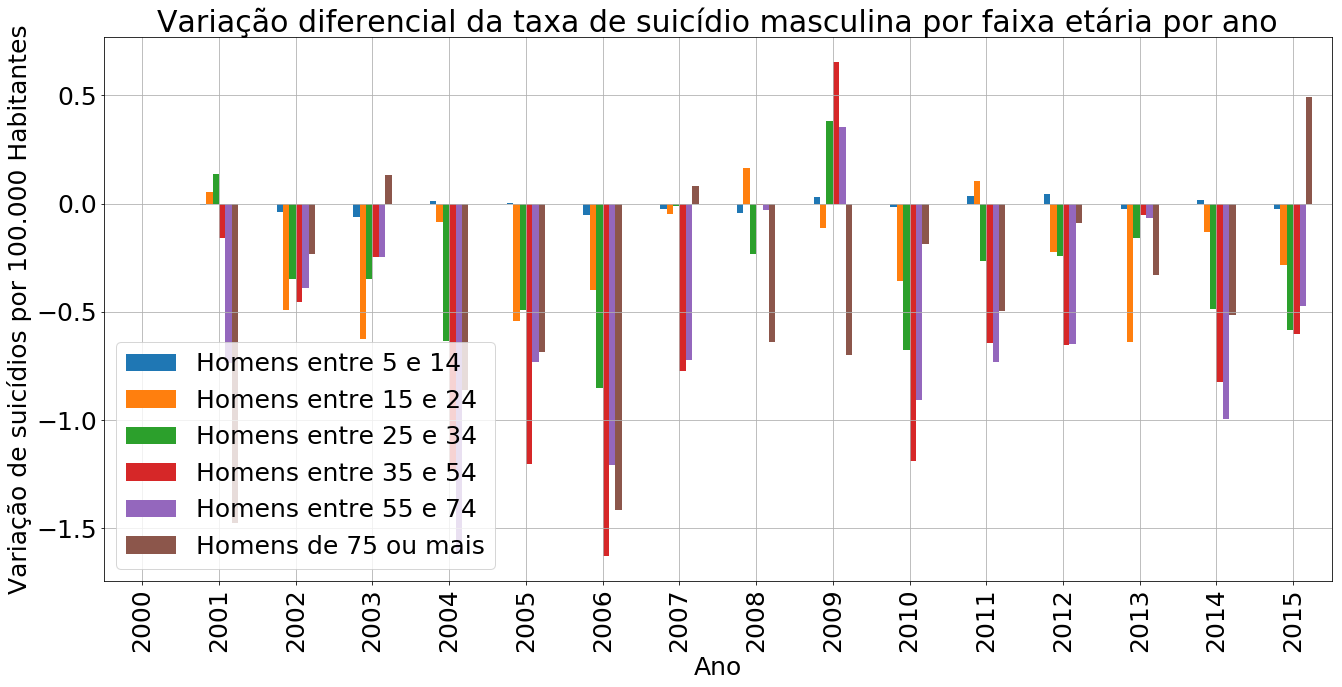

In [64]:
fig, ax = plt.subplots(figsize=(22, 10))
dfmdiff = pd.DataFrame(columns=['une514','une1524', 'une2534', 'une3554','une5574','une75'])
dfmdiff['une514'] = dfm['suicidio514'].calc.derivative()
dfmdiff['une1524'] = dfm['suicidio1524'].calc.derivative()
dfmdiff['une2534'] = dfm['suicidio2534'].calc.derivative()
dfmdiff['une3554'] = dfm['suicidio3554'].calc.derivative()
dfmdiff['une5574'] = dfm['suicidio5574'].calc.derivative()
dfmdiff['une75'] = dfm['suicidio75'].calc.derivative()
dfmdiff['year'] = dfm['year']
dfmdiff.plot(grid=True, kind='bar', ax=ax, x='year', y=['une514','une1524', 'une2534', 'une3554','une5574','une75'])
#dfmdiff['une514'].plot(grid=True, ax=ax, color='red',label="Homens entre 5 e 14")
#dfmdiff['une1524'].plot(grid=True, ax=ax, color='green', label="Homens entre 15 e 24")
#dfmdiff['une2534'].plot(grid=True, ax=ax, color='blue', label="Homens entre 25 e 34")
#dfmdiff['une3554'].plot(grid=True, ax=ax, color='orange', label="Homens entre 35 e 54")
#dfmdiff['une5574'].plot(grid=True, ax=ax, color='purple', label="Homens entre 55 e 74")
#dfmdiff['une75'].plot(grid=True, ax=ax, color='brown', label="Homens de 75 ou mais")
ax.legend(labels=["Homens entre 5 e 14","Homens entre 15 e 24","Homens entre 25 e 34","Homens entre 35 e 54","Homens entre 55 e 74","Homens de 75 ou mais"])
ax.set_xlabel("Ano")
ax.set_ylabel("Variação de suicídios por 100.000 Habitantes")
ax.set_title("Variação diferencial da taxa de suicídio masculina por faixa etária por ano")